In [1]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Load data
movement_data = pd.read_csv('./Data/0-Raw/122-mvmt-right.csv')
skeleton_data = pd.read_csv('./Data/0-Raw/122-skltn-right.csv')

movement_data.tail()

,Unnamed: 0,RKNE_x,RKNE_y,RANK_x,RANK_y,RD3M_x,RD3M_y,RD1M_x,RD1M_y,RHLX_x,RHLX_y
662,662,132.596390,70.016472,63.772686,273.357208,57.873859,314.410797,68.830505,313.487640,NaN,NaN
663,663,132.596390,69.994408,63.309711,273.187286,57.467762,314.325806,68.431473,313.422272,NaN,NaN
664,664,133.052536,69.616699,62.662384,273.143738,56.555092,314.325806,67.837601,313.343750,NaN,NaN
665,665,133.052536,69.437340,62.126549,272.648590,56.080803,313.832062,67.447990,312.059692,NaN,NaN
666,666,133.052536,68.368332,61.457436,271.829803,55.530354,311.487396,67.343796,310.064789,65.39241,336.208008


In [2]:
skeleton_data.head()

,Unnamed: 0,RKNE_RANK_length,RKNE_RANK_orientation,RANK_RD3M_length,RANK_RD3M_orientation,RANK_RD1M_length,RANK_RD1M_orientation,RD1M_RHLX_length,RD1M_RHLX_orientation
0,0,177.418315,107.895606,20.148430,46.259682,NaN,NaN,16.897911,76.054355
1,1,177.236259,107.914611,20.041252,45.965735,NaN,NaN,16.897911,76.054355
2,2,177.357904,107.901908,19.949544,45.710528,NaN,NaN,16.897911,76.054355
3,3,177.988037,107.934534,19.570967,43.622889,NaN,NaN,16.695462,77.104537
4,4,178.110417,107.990656,19.222116,43.347688,NaN,NaN,16.359845,77.827076


In [3]:
movement_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  667 non-null    int64  
 1   RKNE_x      667 non-null    float64
 2   RKNE_y      667 non-null    float64
 3   RANK_x      667 non-null    float64
 4   RANK_y      667 non-null    float64
 5   RD3M_x      654 non-null    float64
 6   RD3M_y      654 non-null    float64
 7   RD1M_x      599 non-null    float64
 8   RD1M_y      599 non-null    float64
 9   RHLX_x      486 non-null    float64
 10  RHLX_y      486 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 57.4 KB


In [4]:
def fill_gaps(df):
    """Fill gaps with sklearn's iterative imputer.

    Args:
        df (DataFrame): raw data with missing values

    Returns:
        DataFrame: data with imputed values
    """
    imp = IterativeImputer(max_iter=100, random_state=42,sample_posterior=False,skip_complete=True)
    cols = df.columns
    imp.fit(df)
    data = imp.transform(df)
    df = pd.DataFrame(data,columns=cols)
    return df

# Fill gaps in the movement data
movement_data = fill_gaps(movement_data)
movement_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  667 non-null    float64
 1   RKNE_x      667 non-null    float64
 2   RKNE_y      667 non-null    float64
 3   RANK_x      667 non-null    float64
 4   RANK_y      667 non-null    float64
 5   RD3M_x      667 non-null    float64
 6   RD3M_y      667 non-null    float64
 7   RD1M_x      667 non-null    float64
 8   RD1M_y      667 non-null    float64
 9   RHLX_x      667 non-null    float64
 10  RHLX_y      667 non-null    float64
dtypes: float64(11)
memory usage: 57.4 KB


In [5]:
# Fill gaps in the skeleton data
skeleton_data = fill_gaps(skeleton_data)
skeleton_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             667 non-null    float64
 1   RKNE_RANK_length       667 non-null    float64
 2   RKNE_RANK_orientation  667 non-null    float64
 3   RANK_RD3M_length       667 non-null    float64
 4   RANK_RD3M_orientation  667 non-null    float64
 5   RANK_RD1M_length       667 non-null    float64
 6   RANK_RD1M_orientation  667 non-null    float64
 7   RD1M_RHLX_length       667 non-null    float64
 8   RD1M_RHLX_orientation  667 non-null    float64
dtypes: float64(9)
memory usage: 47.0 KB


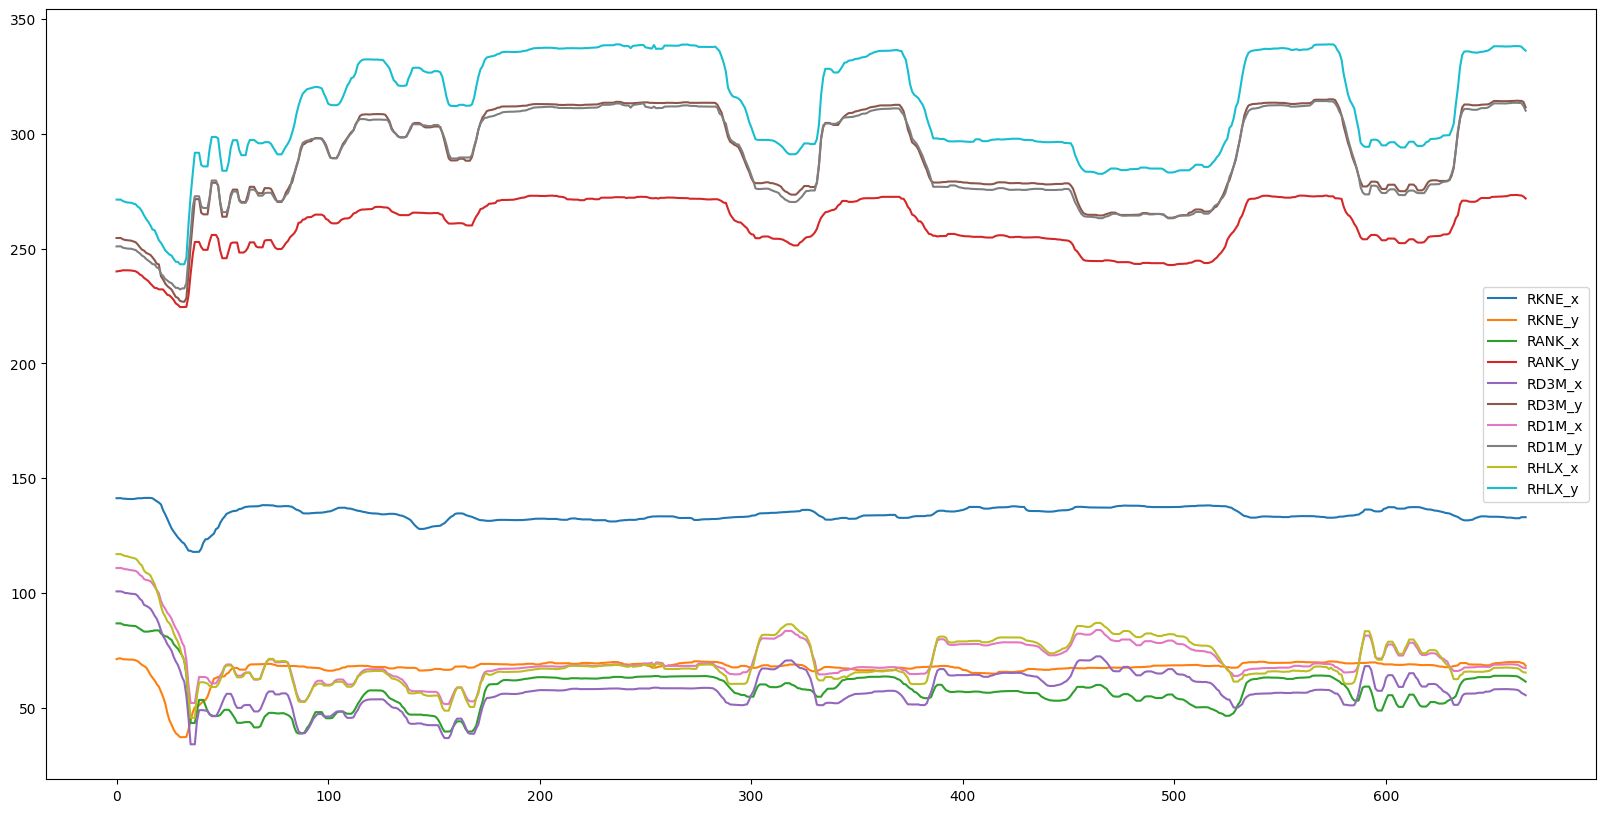

In [11]:
# plot the data
plt.figure(figsize=(20,10))
plt.plot(movement_data['Unnamed: 0'], movement_data['RKNE_x'], label='RKNE_x')
plt.plot(movement_data['Unnamed: 0'], movement_data['RKNE_y'], label='RKNE_y')
plt.plot(movement_data['Unnamed: 0'], movement_data['RANK_x'], label='RANK_x')
plt.plot(movement_data['Unnamed: 0'], movement_data['RANK_y'], label='RANK_y')
plt.plot(movement_data['Unnamed: 0'], movement_data['RD3M_x'], label='RD3M_x')
plt.plot(movement_data['Unnamed: 0'], movement_data['RD3M_y'], label='RD3M_y')
plt.plot(movement_data['Unnamed: 0'], movement_data['RD1M_x'], label='RD1M_x')
plt.plot(movement_data['Unnamed: 0'], movement_data['RD1M_y'], label='RD1M_y')
plt.plot(movement_data['Unnamed: 0'], movement_data['RHLX_x'], label='RHLX_x')
plt.plot(movement_data['Unnamed: 0'], movement_data['RHLX_y'], label='RHLX_y')

plt.legend()

In [ ]:
import cv2
import pandas as pd
import numpy as np

# Load the CSV data (adjust the file path as needed)

# Define the joint connections (update according to your data structure)
joint_connections = [
    ('RKNE', 'RANK'),  # Knee to Ankle
    ('RANK', 'RD3M'),  # Ankle to D3M
    ('RANK', 'RD1M'),   # Ankle to D1M
    ('RD1M', 'RHLX')
]

# Function to draw skeleton on a frame
def draw_skeleton(frame, joints, joint_connections):
    for joint_name, (x, y) in joints.items():
        x_scaled, y_scaled = int(x ), int(y )
        cv2.circle(frame, (x_scaled, y_scaled), 5, (0, 255, 0), -1)
    
    for joint_a, joint_b in joint_connections:
        if joint_a in joints and joint_b in joints:
            x1, y1 = int(joints[joint_a][0] ), int(joints[joint_a][1])
            x2, y2 = int(joints[joint_b][0] ), int(joints[joint_b][1])
            cv2.line(frame, (x1, y1), (x2, y2), (255, 0, 0), 2)
    return frame

# Function to create a video from the skeleton animation
def create_skeleton_video(skeleton_df, joint_connections, output_file='./Data/skeleton_animation.', frame_rate=20):
    frame_width, frame_height = 1000, 1000
    
    # Define the codec and create a VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    video_writer = cv2.VideoWriter(output_file, fourcc, frame_rate, (frame_width, frame_height))
    
    for _, row in skeleton_df.iterrows():
        frame = np.ones((frame_height, frame_width, 3), dtype=np.uint8) * 255
        joints = {joint: (row[f'{joint}_x'], row[f'{joint}_y']) for joint in ['RKNE', 'RANK', 'RD3M', 'RD1M', 'RHLX']}
        frame = draw_skeleton(frame, joints, joint_connections)
        video_writer.write(frame)
    
    video_writer.release()
    print(f"Video saved to {output_file}")

# Run the function to create the video
create_skeleton_video(movement_data, joint_connections, output_file='./data/Visualize_Data/skeleton_animation.mp4', frame_rate=20)
